<a href="https://colab.research.google.com/github/get2aakash/DeepLearning_/blob/main/Transfer_Learning_Feature_ExtractionP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We can leverage a already trained and proved NN ,on similar type of data as ours

In [2]:
#Transfer learning with TF - Feature Extraction
!nvidia-smi #steps to check GPU

Fri Jun 11 13:37:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    36W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#Get data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-06-11 13:40:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.110.128, 142.251.5.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.110.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  48.1MB/s    in 3.3s    

2021-06-11 13:40:36 (48.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
#how many images in each folder
import os

for dirpath,dirname,filename in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_10_percent'
There are 10 directories and 0 images in '10_food_classes_10_percent/train'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_crea

In [11]:
#Preparing the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Images")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                         target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode="categorical")


print("Test Images")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                         target_size=IMAGE_SHAPE,
                                                         batch_size=BATCH_SIZE,
                                                         class_mode="categorical")


Training Images
Found 750 images belonging to 10 classes.
Test Images
Found 2500 images belonging to 10 classes.


In [12]:
#setting up callback - functions that can be added to models during or after training
#Some of popular callbacks:
#1.Tracking experiment with TensorBoard callback
#2.Model Checkpoint with ModelCheckpoint callback
#3.Stopping a model from over fitting with EarlyStopping callback

TensorBoard Callback

In [50]:
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S%")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir) #got this from tf website
  print(f"Saving TF log files to : {log_dir}")
  return tensorboard_callback

Create model from tensorflow Hub from https://tfhub.dev/




In [15]:
#Lets compare following two models

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficient_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [17]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
IMAGE_SHAPE + (3,) 

In [29]:
#create model function

def create_model(model_url,num_classes=10):
  """
  Takes a TF url and create keras sequential model with it and returns uncompiled keras sequential model with  model url as feature_extractor layer and dense output layer with num_classes output neurons.
  """
  #Download model
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape = IMAGE_SHAPE+(3,))
  #Create own model
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes,activation="Softmax",name="output_layer")
  ])

  return model


## **Create** resnet model


In [30]:

resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [31]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2048)              23564800  
_________________________________________________________________
output_layer (Dense)         (None, 10)                20490     
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [32]:
#Compile resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [52]:
#Lets fit our model to train data
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="resnet50V2"
                                                                         )])

Saving TF log files to : tensorflow_hub/resnet50V2/20210611-144434%
Epoch 1/5
24/24 [==============================] - 57s 1s/step - loss: 2.1093 - accuracy: 0.2973 - val_loss: 1.2887 - val_accuracy: 0.5908
Epoch 2/5
24/24 [==============================] - 21s 920ms/step - loss: 0.9542 - accuracy: 0.7307 - val_loss: 0.8668 - val_accuracy: 0.7160
Epoch 3/5
24/24 [==============================] - 22s 922ms/step - loss: 0.6253 - accuracy: 0.8293 - val_loss: 0.7541 - val_accuracy: 0.7504
Epoch 4/5
24/24 [==============================] - 22s 922ms/step - loss: 0.4842 - accuracy: 0.8720 - val_loss: 0.7048 - val_accuracy: 0.7644
Epoch 5/5
24/24 [==============================] - 22s 931ms/step - loss: 0.3780 - accuracy: 0.9267 - val_loss: 0.6655 - val_accuracy: 0.7772


In [55]:
#lets create loss curve
import matplotlib.pyplot as plt

def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss= history.history["val_loss"]
  
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss and validation loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot accuracy and validatoin accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

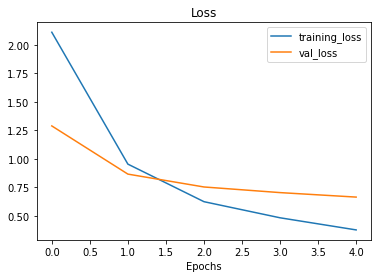

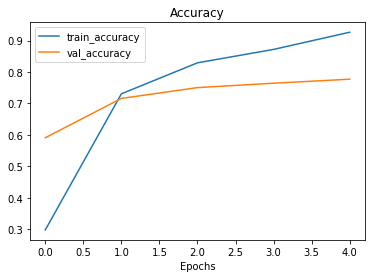

In [54]:
plot_loss_curves(resnet_history)

## **Create** Effecient model


In [58]:
#create model
efficient_model = create_model(model_url=efficient_url,
                            num_classes=train_data_10_percent.num_classes)

In [59]:
#compile mode

efficient_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [64]:
#fit effienient model
efficientnet_history = efficient_model.fit(train_data_10_percent,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                         experiment_name="effiecient"
                                                                         )])

Saving TF log files to : tensorflow_hub/effiecient/20210611-151010%
Epoch 1/10
24/24 [==============================] - 21s 905ms/step - loss: 0.4526 - accuracy: 0.9053 - val_loss: 0.5257 - val_accuracy: 0.8668
Epoch 2/10
24/24 [==============================] - 19s 819ms/step - loss: 0.3986 - accuracy: 0.9213 - val_loss: 0.5010 - val_accuracy: 0.8684
Epoch 3/10
24/24 [==============================] - 19s 824ms/step - loss: 0.3525 - accuracy: 0.9387 - val_loss: 0.4810 - val_accuracy: 0.8724
Epoch 4/10
24/24 [==============================] - 19s 810ms/step - loss: 0.3173 - accuracy: 0.9547 - val_loss: 0.4640 - val_accuracy: 0.8728
Epoch 5/10
24/24 [==============================] - 19s 826ms/step - loss: 0.2878 - accuracy: 0.9600 - val_loss: 0.4487 - val_accuracy: 0.8748
Epoch 6/10
24/24 [==============================] - 19s 815ms/step - loss: 0.2611 - accuracy: 0.9667 - val_loss: 0.4412 - val_accuracy: 0.8740
Epoch 7/10
24/24 [==============================] - 19s 819ms/step - loss:

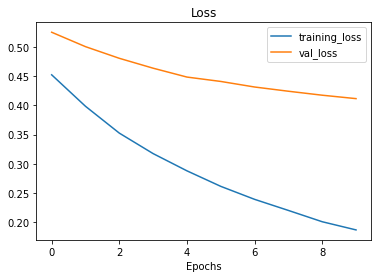

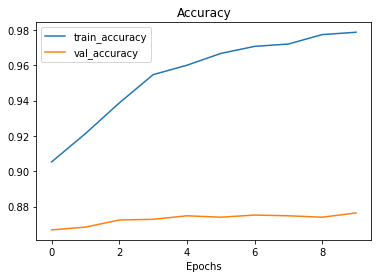

In [65]:
plot_loss_curves(efficientnet_history)

In [66]:
efficient_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 1280)              4049564   
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


Types of transfer learning


1.   As is transfer learning
2.   Feature extraction (this notebook)
3.   Fine tuning 

### **TensorBoard**

In [ ]:
#Upload Tensorboard dev records
!tensorboard dev upload --logdir ./content/tensorflow_hub/ \
  --name "Effecient net vs ResNet" \
  --description "Comparing two different feature extraction model architecture" \
  --one_shot

2021-06-11 15:45:15.772722: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./content/tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) 